## Preprocessing

In [208]:
pip install pathlib


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [209]:
pip install keras_tuner


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [210]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from pathlib import Path
import keras_tuner as kt

#  Import and read the charity_data.csv.
heart_df = pd.read_csv(Path('./heart.csv'))
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [211]:
# Determine the number of unique values in each column.
heart_df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [212]:
# Convert categorical data to numeric with `pd.get_dummies`
heart_df = pd.get_dummies(heart_df)
heart_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [213]:
# Split our preprocessed data into our features and target arrays
y = heart_df['HeartDisease']
X = heart_df.drop(columns=['HeartDisease'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [214]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [215]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=20))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 80)                1680      
                                                                 
 dense_6 (Dense)             (None, 30)                2430      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4141 (16.18 KB)
Trainable params: 4141 (16.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [216]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [217]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
22/22 [==============================] - 0s 593us/step - loss: 0.5865 - accuracy: 0.7398
Epoch 2/100
22/22 [==============================] - 0s 426us/step - loss: 0.3983 - accuracy: 0.8619
Epoch 3/100
22/22 [==============================] - 0s 411us/step - loss: 0.3415 - accuracy: 0.8692
Epoch 4/100
22/22 [==============================] - 0s 398us/step - loss: 0.3207 - accuracy: 0.8750
Epoch 5/100
22/22 [==============================] - 0s 395us/step - loss: 0.3105 - accuracy: 0.8808
Epoch 6/100
22/22 [==============================] - 0s 395us/step - loss: 0.3004 - accuracy: 0.8823
Epoch 7/100
22/22 [==============================] - 0s 444us/step - loss: 0.2926 - accuracy: 0.8823
Epoch 8/100
22/22 [==============================] - 0s 402us/step - loss: 0.2843 - accuracy: 0.8939
Epoch 9/100
22/22 [==============================] - 0s 403us/step - loss: 0.2790 - accuracy: 0.8881
Epoch 10/100
22/22 [==============================] - 0s 408us/step - loss: 0.2739 - accura

In [218]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.7544 - accuracy: 0.8478 - 47ms/epoch - 6ms/step
Loss: 0.75443434715271, Accuracy: 0.8478260636329651


## Tune the model with keras tuner

In [219]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=80,
        max_value=100,
        step=2), activation=activation, input_dim=20))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 4)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=30,
            max_value=60,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [220]:
# Define the tuner
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2,
    overwrite=True)

In [221]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 180 Complete [00h 00m 02s]
val_accuracy: 0.8913043737411499

Best val_accuracy So Far: 0.908695638179779
Total elapsed time: 00h 02m 14s
INFO:tensorflow:Oracle triggered exit


In [222]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 82,
 'num_layers': 2,
 'units_0': 46,
 'units_1': 30,
 'units_2': 60,
 'units_3': 32,
 'tuner/epochs': 17,
 'tuner/initial_epoch': 6,
 'tuner/bracket': 3,
 'tuner/round': 2,
 'tuner/trial_id': '0124'}

In [223]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2805 - accuracy: 0.9087 - 71ms/epoch - 9ms/step
Loss: 0.2804891765117645, Accuracy: 0.908695638179779


In [224]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 82)                1722      
                                                                 
 dense_1 (Dense)             (None, 46)                3818      
                                                                 
 dense_2 (Dense)             (None, 30)                1410      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6981 (27.27 KB)
Trainable params: 6981 (27.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [225]:
heart_df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [226]:
# Assuming you've retrieved the weights for a dense layer
weights = best_model.layers[0].get_weights()[0] 


In [227]:
print("Weights shape:", weights.shape)
print("Weights content:", weights)

Weights shape: (20, 82)
Weights content: [[-0.17550938 -0.11017811 -0.05703744 ... -0.04026486 -0.10291973
  -0.08971095]
 [-0.13841112 -0.13829151  0.13380629 ...  0.00317601 -0.0024296
  -0.00829607]
 [ 0.25835854  0.21194544 -0.04934194 ...  0.16147181 -0.0185212
  -0.14042182]
 ...
 [-0.15582582 -0.2084829   0.15456219 ...  0.06655629 -0.1041071
  -0.24290471]
 [-0.09909753 -0.24050552  0.03289168 ... -0.06474309 -0.15953611
  -0.25102678]
 [ 0.13076891 -0.13762179  0.02943754 ... -0.1330921   0.05845324
   0.26190054]]


In [228]:
feature_names = heart_df.columns.tolist()

In [229]:
# Calculate the absolute sum of weights for each feature
feature_importance = abs(weights).sum(axis=1)

In [230]:
# Pair each feature importance with its corresponding feature name
feature_importance = list(zip(feature_names, feature_importance))
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance:
    print(f"Feature: {feature}, Importance: {importance:.4f}")


Feature: ST_Slope_Flat, Importance: 11.9891
Feature: ChestPainType_ASY, Importance: 11.1053
Feature: Oldpeak, Importance: 11.0003
Feature: RestingECG_ST, Importance: 10.7936
Feature: ChestPainType_NAP, Importance: 10.7604
Feature: Sex_F, Importance: 10.7583
Feature: Cholesterol, Importance: 10.6004
Feature: RestingBP, Importance: 10.5249
Feature: RestingECG_LVH, Importance: 10.4997
Feature: Age, Importance: 10.3713
Feature: HeartDisease, Importance: 10.2474
Feature: ExerciseAngina_Y, Importance: 10.1475
Feature: FastingBS, Importance: 10.1410
Feature: ST_Slope_Down, Importance: 10.0698
Feature: Sex_M, Importance: 10.0311
Feature: ChestPainType_TA, Importance: 9.9255
Feature: ChestPainType_ATA, Importance: 9.6334
Feature: RestingECG_Normal, Importance: 9.2156
Feature: ExerciseAngina_N, Importance: 8.9990
Feature: MaxHR, Importance: 8.7274


In [252]:
# Visualization
features, importance = zip(*feature_importance)

# Set Matplotlib parameters for white elements
plt.rcParams.update({
    "figure.facecolor": "none",
    "text.color": "white",
    "grid.color": "white",
    "axes.facecolor": "none",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white"
})

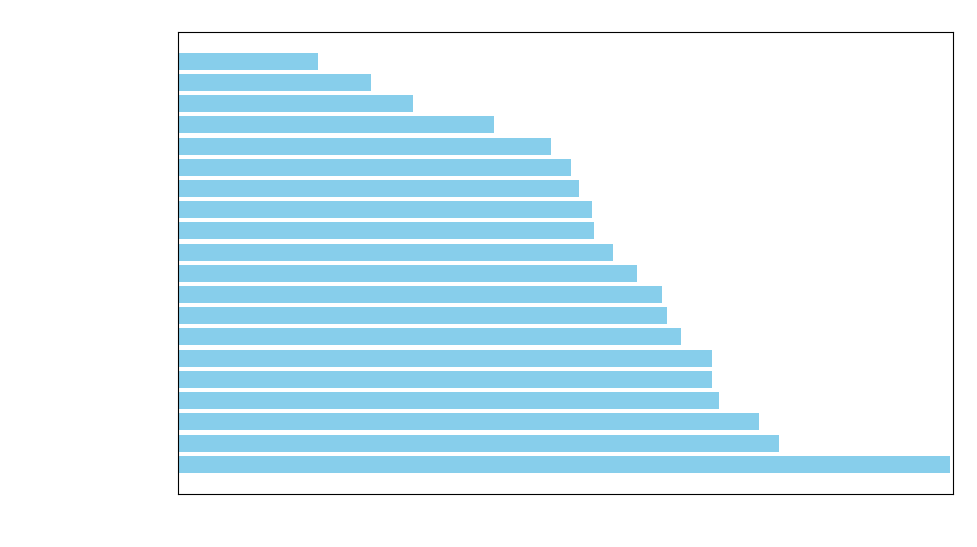

In [253]:

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Based on Weights")
plt.xlim(8, 12)
plt.show()



In [233]:
import numpy as np
import matplotlib.pyplot as plt